## 実験概要
RV-SGDにおけるサンプル数について変化させながら分割数ごとの過剰期待損失、そのステップごとの推移を確認する。

- ノイズの種類
    - 正規分布
        - 平均0
        - 分散
            - 2.2

    - 対数正規分布
        - 平均0
        - 分散
            - 1.75

- 次元数
    - 128

- n
    - 100
    - 1000
    - 10000
    - 100000

トライアルの回数は100,ただし損失の推移についてはそのうちの一回を使用

## 結果


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

from ML2_lib import RV_SGDAve
from ML2_lib import loss
from ML2_lib import plot_set

In [2]:
X_mean = 5
X_var = 2
son = loss.LinearQuadraticLoss()
columns=['1', '2', '4','5','10','20']
k_list = [0,1,3,4,9,19]
n = 100
c = 1
noise = "normal"


  0%|          | 0/100 [00:00<?, ?it/s]

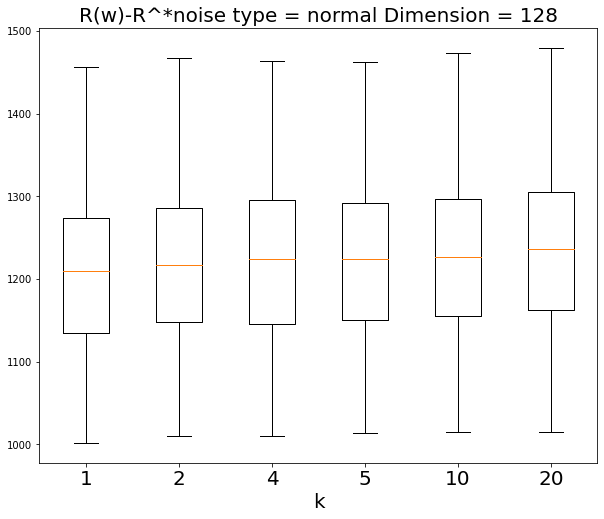

In [3]:
E_var = 1.75

w_star = np.arange(128)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [4]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1207.783387,1218.973225,1224.150816,1225.129728,1229.535204,1237.482896
std,99.656282,100.204866,100.086805,99.669300,100.113280,99.991513
min,1001.661226,1010.355468,1010.735399,1013.380489,1014.959847,1014.970378
25%,1135.052867,1148.227443,1146.223745,1150.232816,1154.847295,1163.028113
50%,1209.719933,1217.399211,1224.789698,1224.209603,1226.448365,1235.802309
75%,1274.194533,1286.039775,1295.286042,1291.395107,1296.454635,1305.593382
max,1456.442953,1467.757219,1463.278486,1461.996123,1473.321601,1479.824803


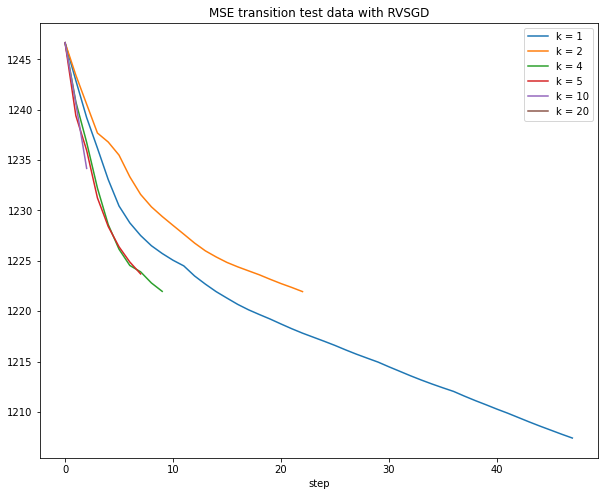

In [5]:
k_list_tr = [1,2,4,5,10,20]
transition_result = RV.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with RVSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

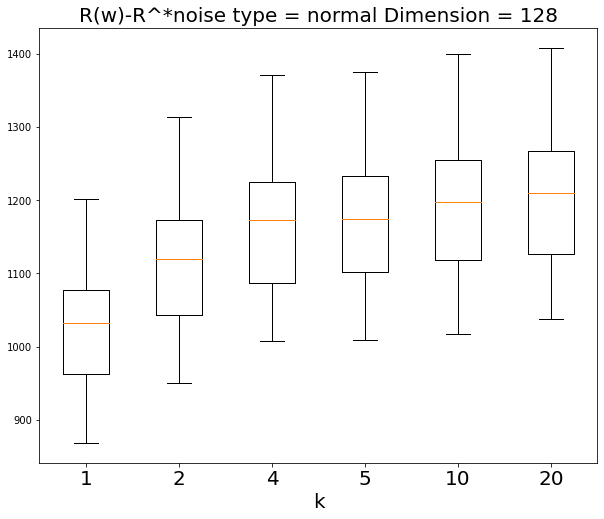

In [6]:

E_var = 1.75

n = 1000
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [7]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1025.602617,1114.734762,1164.288014,1173.332326,1193.951483,1204.452457
std,79.353752,84.160501,86.567739,87.585433,89.831987,90.663541
min,868.249726,950.139225,1008.178586,1008.849062,1017.626129,1037.967941
25%,962.334532,1043.312176,1087.123625,1102.048127,1118.983474,1126.065209
50%,1031.647858,1119.427179,1173.070705,1174.776778,1197.182308,1209.459001
75%,1076.881851,1172.726712,1225.641586,1232.902276,1255.386805,1267.643819
max,1201.472929,1313.723496,1371.796056,1374.949021,1399.773340,1408.535897


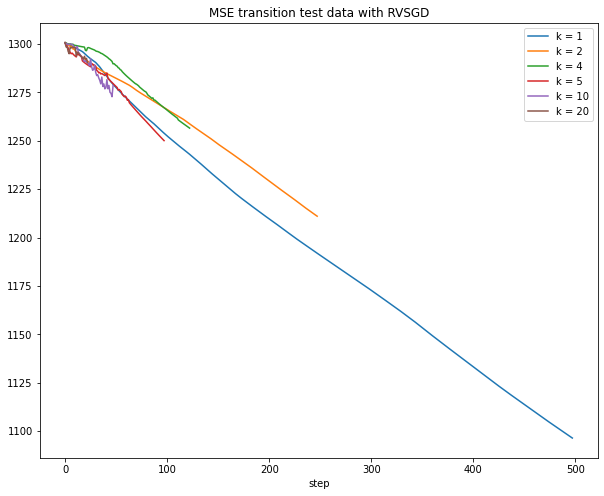

In [8]:
k_list_tr = [1,2,4,5,10,20]
transition_result = RV.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with RVSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)


  0%|          | 0/100 [00:00<?, ?it/s]

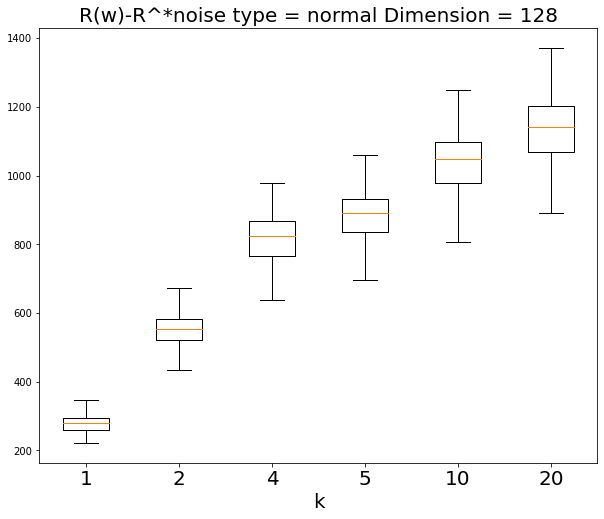

In [9]:

E_var = 1.75
n = 10000
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [10]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,279.185841,552.606697,816.183557,884.272265,1044.970357,1136.845000
std,25.555177,48.267139,72.894622,75.100227,91.382068,97.953243
min,221.464066,433.763579,638.847375,694.839338,807.422614,891.048008
25%,258.443618,521.757202,764.578465,836.875805,978.126884,1068.386286
50%,280.321146,554.194481,822.805437,892.054181,1047.763467,1141.677353
75%,294.977797,582.402514,866.247288,931.662255,1096.817856,1201.427711
max,345.340469,671.999615,978.696100,1060.351150,1247.580090,1372.135051


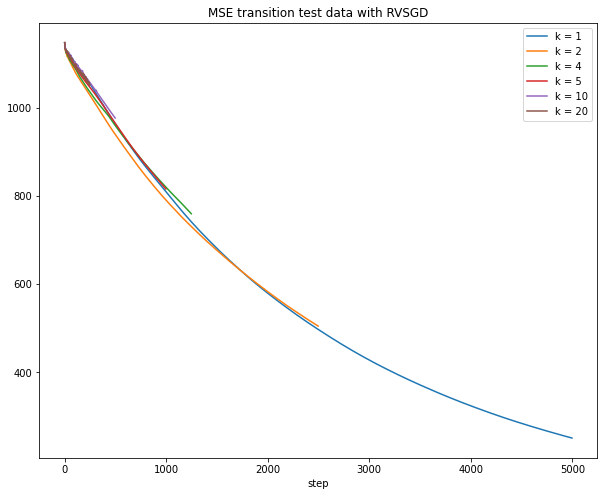

In [11]:
k_list_tr = [1,2,4,5,10,20]
transition_result = RV.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with RVSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

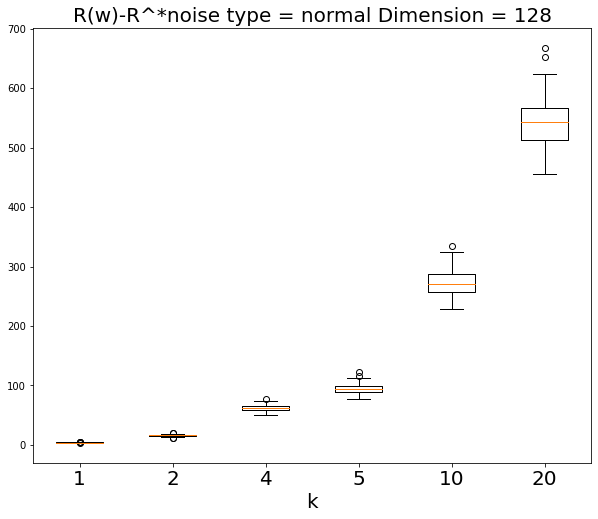

In [12]:

E_var = 1.75
n = 100000
w_star = np.arange(128)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [13]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.079713,16.080551,62.593655,94.743708,272.614400,544.329104
std,0.350120,1.349319,5.306861,8.118535,22.623747,42.054512
min,3.248820,12.393880,50.657877,77.851924,228.733657,456.197051
25%,3.879889,15.431648,58.600600,89.409916,257.907366,513.277485
50%,4.049479,15.982785,62.771238,94.611476,270.528455,543.354682
75%,4.293437,16.924807,66.269673,99.926777,286.825838,565.840246
max,5.103710,19.797026,78.103419,123.206758,334.416964,668.067648


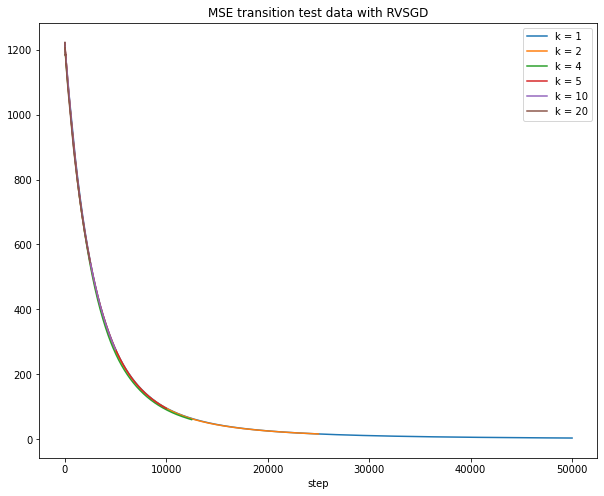

  0%|          | 0/100 [00:00<?, ?it/s]

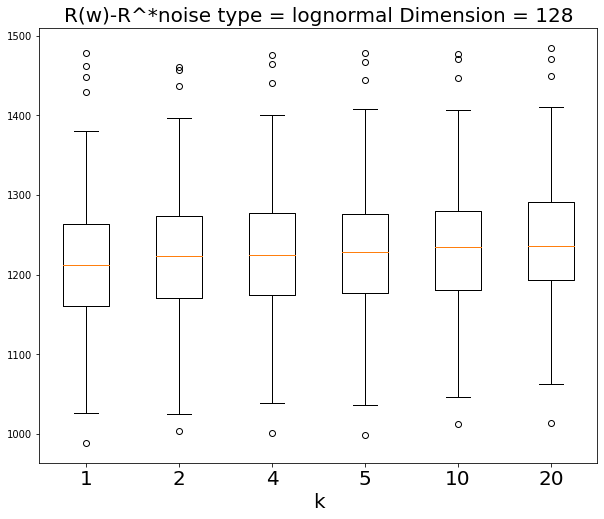

In [14]:
#lognormal noise

noise = "lognormal"
k_list_tr = [1,2,4,5,10,20]
transition_result = RV.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with RVSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

E_var = 1.75
n = 100
w_star = np.arange(128)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [15]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1214.252033,1222.203276,1226.839005,1228.012896,1233.231888,1241.466331
std,92.442027,88.847929,88.369418,88.531695,86.896026,86.033299
min,988.685129,1004.165478,1001.817330,998.815935,1012.556940,1014.277765
25%,1160.475566,1171.260220,1175.193468,1177.597841,1180.481508,1193.122246
50%,1212.769038,1223.930108,1225.340335,1228.104272,1234.633904,1235.943734
75%,1263.318435,1273.449867,1277.124231,1276.415356,1279.617279,1291.157841
max,1478.136273,1460.307538,1476.026328,1478.855638,1477.821897,1485.128682


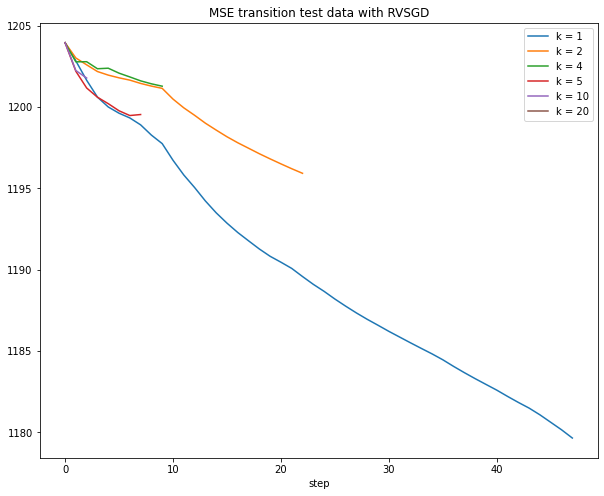

In [16]:
k_list_tr = [1,2,4,5,10,20]
transition_result = RV.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with RVSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

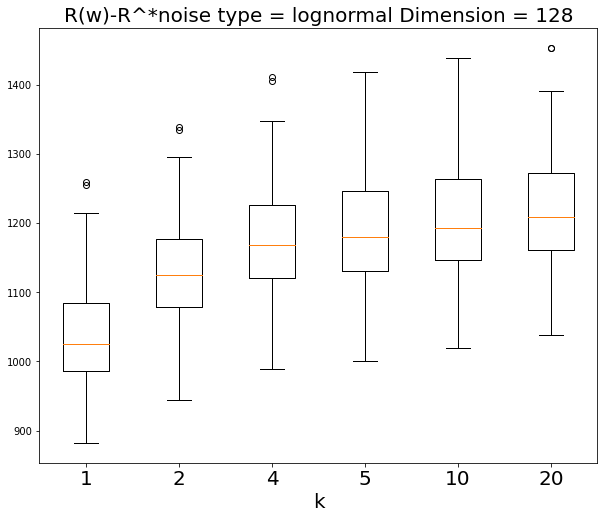

In [17]:

E_var = 1.75
n = 1000
w_star = np.arange(128)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [18]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1037.004415,1124.915924,1172.163294,1181.687474,1201.270988,1211.496281
std,80.505113,84.106370,86.754791,88.211561,89.698893,89.374150
min,882.093253,944.931570,988.623569,1000.575076,1019.815366,1038.196775
25%,985.602487,1078.150508,1121.178459,1130.536930,1147.410520,1161.409118
50%,1025.625313,1125.223435,1167.900158,1179.494135,1193.005732,1209.418462
75%,1084.880941,1177.714435,1226.591601,1246.905742,1264.179365,1271.910327
max,1259.573928,1338.985492,1411.773657,1419.089569,1439.252234,1453.667584


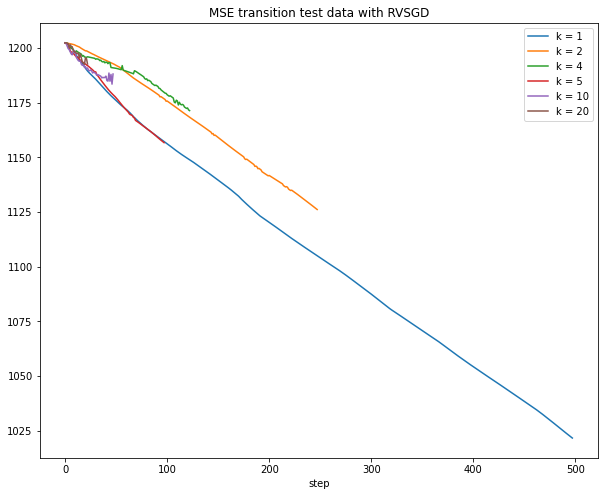

In [19]:
k_list_tr = [1,2,4,5,10,20]
transition_result = RV.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with RVSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)


  0%|          | 0/100 [00:00<?, ?it/s]

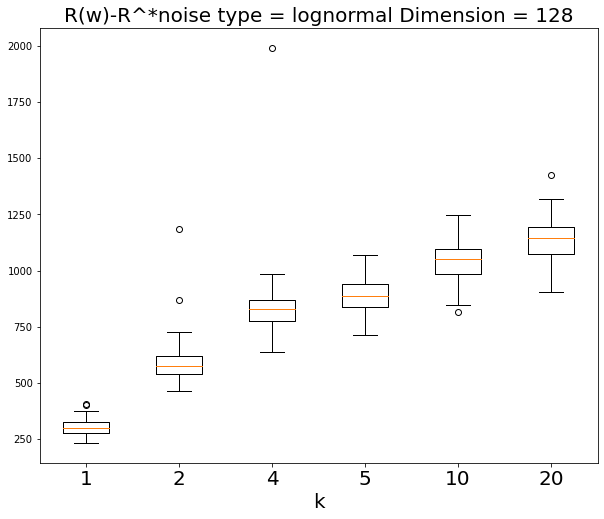

In [20]:

E_var = 1.75
n = 10000
w_star = np.arange(128)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [21]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,302.040081,584.541855,833.627349,888.047777,1040.359879,1133.193342
std,34.622851,86.540527,134.573321,76.333412,85.884778,91.436985
min,232.426416,465.795152,637.676656,714.188150,814.269898,903.959066
25%,277.599225,539.300550,776.569698,839.726403,985.553743,1072.055021
50%,300.250573,575.446965,827.937777,888.575187,1051.183635,1143.871755
75%,324.061487,618.678001,869.221094,940.429768,1095.049864,1193.893008
max,407.613289,1186.247453,1991.611317,1068.873389,1247.966463,1423.758083


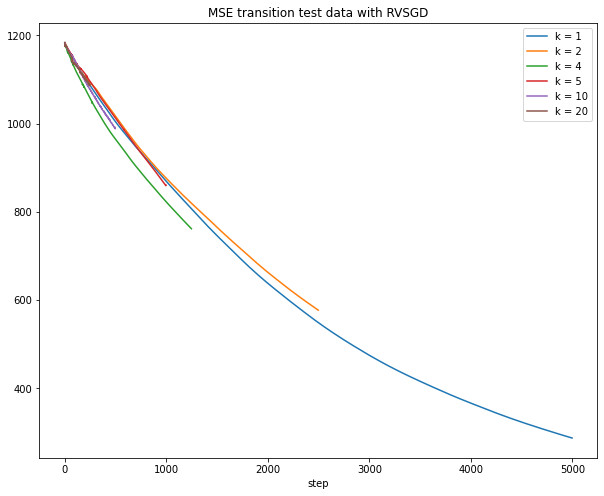

In [22]:
k_list_tr = [1,2,4,5,10,20]
transition_result = RV.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with RVSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

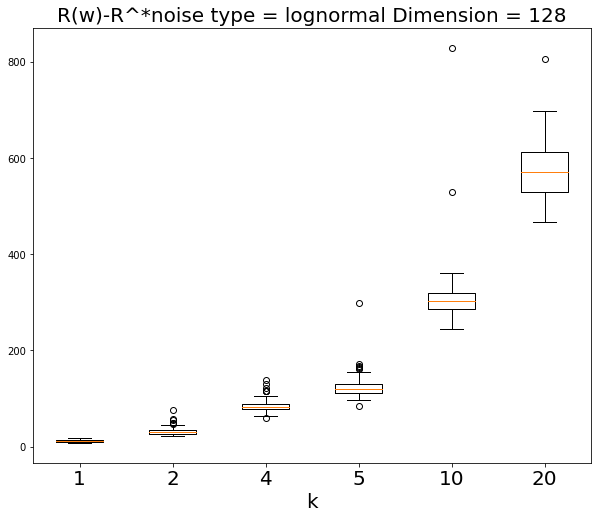

In [23]:

E_var = 1.75
n = 100000
w_star = np.arange(128)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

title = f"noise type = {noise} Dimension = {d}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True,lr=0.001)
trial_num  = 100
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [24]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_D{d}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,11.746243,31.537056,85.263500,124.400767,309.214490,575.641145
std,2.424376,8.179851,13.769031,24.403464,63.160128,58.815694
min,7.318356,21.565958,60.078951,83.614444,244.731760,467.056630
25%,9.817740,26.507593,77.217544,111.807004,285.975871,528.978612
50%,11.502509,30.043351,82.518589,120.754172,302.971058,571.709518
75%,13.221769,33.561795,88.431566,129.983547,320.555170,613.717113
max,17.638955,75.391316,138.753493,298.567190,830.042577,806.986563


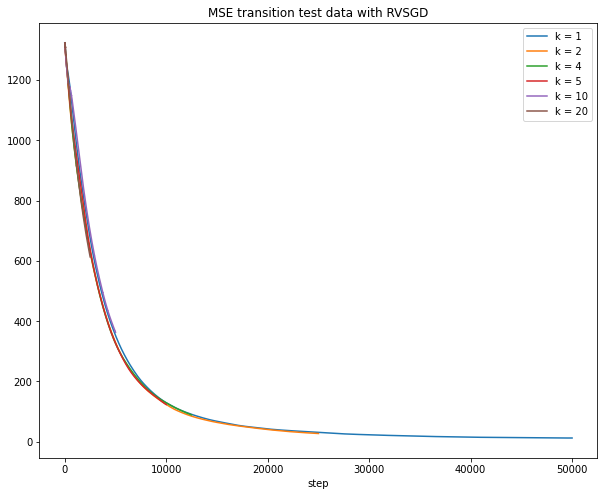

In [25]:
k_list_tr = [1,2,4,5,10,20]
transition_result = RV.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with RVSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)